# Partie 1: Compréhension du métier (Business Understanding)


### 1.1 Description du métier
Le dataset représente un système de location de vélos à Washington D.C., où les utilisateurs peuvent louer et rendre des vélos à différents points. Des facteurs environnementaux et contextuels comme la saison, la météo, et les jours fériés influencent le comportement de location.

### 1.2 Problématique
Prédire le nombre de vélos loués en fonction des conditions environnementales et calendaires.

### 1.3 Objectifs métier et objectifs de science des données

| **Business Objective (BO)** | **Data Science Objective (DSO)** |
|-----------------------------|----------------------------------|
| **BO1**: Optimiser la gestion des vélos disponibles en fonction de l'environnement et des infrastructures pour anticiper la demande. | **DSO1**: Utiliser les nouvelles variables (infrastructures de vélo, accessibilité des transports publics, zone d’utilisation, pollution de l’air) pour prédire le nombre de locations de vélos. |
| **BO2**: Planifier la maintenance des vélos selon l'utilisation par segment d'utilisateurs et améliorer la satisfaction. | **DSO2**: Identifier les niveaux d'activité des utilisateurs et leurs habitudes (`user_activity_level`, `user_satisfaction`) pour ajuster la maintenance et améliorer la qualité du service. |
| **BO3**: Analyser l'impact des facteurs socio-économiques et environnementaux sur la location de vélos. | **DSO3**: Modéliser la relation entre le **niveau de revenu**, l'**indice de pollution**, et d'autres variables socio-économiques (`income_level`, `air_pollution_index`, `public_transport_access`) sur l'utilisation des vélos. |


# Partie 2: Compréhension des données (Data Understanding)


## 2.1 Importer les données


In [1]:
import pandas as pd
data = pd.read_csv('datahour.csv') 



## 2.2 Description des Variables du Dataset Bike Sharing (version init)



| **Nom de la variable** | **Description** |
|------------------------|-----------------|
| **Instant**            | Identificateur unique pour chaque enregistrement. |
| **dteday**             | Date précise de la location des vélos. |
| **season**             | Saison de l'année, codée de 1 à 4 (1: printemps, 2: été, 3: automne, 4: hiver). |
| **yr**                 | Année (0 pour 2011, 1 pour 2012). |
| **mnth**               | Mois de l'année (1 à 12). |
| **hr**                 | Heure de la journée (0 à 23). |
| **holiday**            | Indique si le jour est un jour férié (0 : non, 1 : oui). |
| **weekday**            | Jour de la semaine (0 pour dimanche, 6 pour samedi). |
| **workingday**         | Indique si le jour est un jour ouvrable (ni week-end, ni jour férié). |
| **weathersit**         | Situation météorologique : <br> 1: Clair, partiellement nuageux <br> 2: Brume + nuages <br> 3: Pluie légère, neige légère <br> 4: Fortes précipitations. |
| **temp**               | Température normalisée (valeurs divisées par 41°C, max possible). |
| **atemp**              | Température ressentie normalisée (valeurs divisées par 50°C, max possible). |
| **hum**                | Humidité relative normalisée (valeurs divisées par 100, max possible). |
| **windspeed**          | Vitesse du vent normalisée (valeurs divisées par 67, max possible). |
| **casual**             | Nombre de locations par des utilisateurs occasionnels. |
| **registered**         | Nombre de locations par des utilisateurs enregistrés. |
| **cnt**                | Nombre total de vélos loués (inclus utilisateurs occasionnels et enregistrés). |

### Remarque : 
Le dataset contient initialement des données temporelles telles que : `dteday` (date), `season` (saison), `yr` (année), `mnth` (mois), `hr` (heure), `holiday` (jour férié), `weekday` (jour de la semaine), et `workingday` (jour ouvré). Ces colonnes seront remplacées par d'autres variables non temporelles simulées afin d'enrichir le dataset avec des informations contextuelles et socio-économiques.


### Correction du Dataset :

1. **Supprimer les colonnes temporelles** :
   Les colonnes suivantes, liées au temps, seront supprimées du dataset :
   - `dteday` (date)
   - `season` (saison)
   - `yr` (année)
   - `mnth` (mois)
   - `hr` (heure)
   - `holiday` (jour férié)
   - `weekday` (jour de la semaine)
   - `workingday` (jour ouvré)

2. **Remplacer par d'autres colonnes non temporelles** :
   Afin d'enrichir le dataset, les colonnes supprimées seront remplacées par des variables non temporelles simulées :
   - `user_activity_level` : Niveau d'activité des utilisateurs (faible, moyen, élevé)
   - `user_type` : Type d'utilisateur (occasionnel ou fréquent)
   - `income_level` : Niveau de revenu moyen des utilisateurs (entre 20 000 et 100 000)
   - `zone_type` : Type de zone (résidentiel ou commercial)
   - `user_satisfaction` : Indice de satisfaction des utilisateurs (entre 1 et 5)
   - `bike_infrastructure_score` : Score de l'infrastructure cyclable (entre 1 et 10)
   - `air_pollution_index` : Indice de pollution de l'air (entre 1 et 100)
   - `public_transport_access` : Accessibilité des transports publics (entre 1 et 10)

Ces nouvelles colonnes ajoutent des informations contextuelles, socio-économiques et environnementales afin de mieux modéliser la demande de vélos.


In [13]:
# Afficher les colonnes existantes
print("Colonnes existantes:", data.columns.tolist())

# Supprimer les colonnes uniquement si elles existent
columns_to_drop = ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday']
existing_columns = [col for col in columns_to_drop if col in data.columns]

if existing_columns:
    data = data.drop(columns=existing_columns,inplace=False)
else:
    print("Aucune colonne à supprimer.")


Colonnes existantes: ['instant', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'user_activity_level', 'user_type', 'income_level', 'zone_type', 'user_satisfaction', 'bike_infrastructure_score', 'air_pollution_index', 'public_transport_access']
Aucune colonne à supprimer.


In [14]:
import pandas as pd
import numpy as np

# 1. Ajout d'une colonne simulée pour le niveau d'activité des utilisateurs
data['user_activity_level'] = np.random.choice(['faible', 'moyen', 'élevé'], size=len(data))

# 2. Ajout d'une colonne simulée pour le type d'utilisateur (occasionnel ou fréquent)
data['user_type'] = np.random.choice(['occasionnel', 'frequent'], size=len(data))

# 3. Ajout d'une colonne simulée pour le niveau de revenu (par exemple, entre 20000 et 100000 unités monétaires)
data['income_level'] = np.random.randint(20000, 100000, size=len(data))

# 4. Ajout d'une colonne simulée pour le type de zone (résidentiel ou commercial)
data['zone_type'] = np.random.choice(['residentiel', 'commercial'], size=len(data))

# 5. Ajout d'une colonne simulée pour l'indice de satisfaction des utilisateurs (entre 1 et 5)
data['user_satisfaction'] = np.random.randint(1, 6, size=len(data))  # Valeurs entières entre 1 (faible) et 5 (élevé)

# 6. Ajout d'une colonne simulée pour le nombre d'infrastructures de vélo dans la zone
data['bike_infrastructure_score'] = np.random.randint(1, 11, size=len(data))  # Valeur entre 1 et 10

# 7. Ajout d'une colonne simulée pour le niveau de pollution atmosphérique (entre 1 et 100)
data['air_pollution_index'] = np.random.randint(1, 101, size=len(data))  # Valeur entre 1 (faible pollution) et 100 (haute pollution)

# 8. Ajout d'une colonne simulée pour l'accessibilité des transports publics (entre 1 et 10)
data['public_transport_access'] = np.random.randint(1, 11, size=len(data))  # Valeur entre 1 (faible accessibilité) et 10 (excellente accessibilité)

data.to_csv('datahour_v1.csv', index=False)  # Sauvegarde sans l'index




## 2.2 Description des Variables du Dataset Bike Sharing (version 1)


| **Nom de la Variable**              | **Description**                                                                                   | **Type de Donnée**   | **Plage de Valeurs**                       |
|-------------------------------------|---------------------------------------------------------------------------------------------------|----------------------|--------------------------------------------|
| `Instant`                           | Identificateur unique pour chaque enregistrement                                                 | Numérique            | 1, 2, 3, ... (identifiants uniques)       |
| `temp`                              | Température normalisée (valeurs divisées par 41°C, max possible)                                | Numérique            | entre 0 et 1                               |
| `atemp`                             | Température ressentie normalisée (valeurs divisées par 50°C, max possible)                     | Numérique            | entre 0 et 1                               |
| `hum`                               | Humidité relative normalisée (valeurs divisées par 100, max possible)                           | Numérique            | entre 0 et 1                               |
| `windspeed`                         | Vitesse du vent normalisée (valeurs divisées par 67, max possible)                             | Numérique            | entre 0 et 1                               |
| `casual`                            | Nombre de locations par des utilisateurs occasionnels                                             | Numérique            | 0 et plus                                  |
| `registered`                        | Nombre de locations par des utilisateurs enregistrés                                             | Numérique            | 0 et plus                                  |
| `cnt`                               | Nombre total de vélos loués (inclus utilisateurs occasionnels et enregistrés)                   | Numérique            | 0 et plus                                  |
| `user_activity_level`               | Niveau d'activité des utilisateurs (faible, moyen, élevé)                                       | Catégorique          | faible, moyen, élevé                       |
| `user_type`                         | Type d'utilisateur (occasionnel ou fréquent)                                                    | Catégorique          | occasionnel, fréquent                      |
| `income_level`                      | Niveau de revenu moyen des utilisateurs                                                          | Numérique            | entre 20 000 et 100 000                   |
| `zone_type`                        | Type de zone (résidentiel ou commercial)                                                        | Catégorique          | résidentiel, commercial                    |
| `user_satisfaction`                | Indice de satisfaction des utilisateurs                                                           | Numérique            | entre 1 et 5                               |
| `bike_infrastructure_score`         | Score de l'infrastructure cyclable                                                                | Numérique            | entre 1 et 10                              |
| `air_pollution_index`              | Indice de pollution de l'air                                                                      | Numérique            | entre 1 et 100                             |
| `public_transport_access`           | Accessibilité des transports publics                                                               | Numérique            | entre 1 et 10                              |
| `weathersit`                       | Situation météorologique : <br> 1: Clair, partiellement nuageux <br> 2: Brume + nuages <br> 3: Pluie légère, neige légère <br> 4: Fortes précipitations | Numérique (Catégorique)          | 1, 2, 3, 4                                 |


## 2.3 Dimensions des données


In [15]:
import pandas as pd

data = pd.read_csv('datahour_v1.csv') 
print("Dimensions des données: (Nbr lignes, Nbr colonnes)", data.shape)


Dimensions des données: (Nbr lignes, Nbr colonnes) (17484, 17)


## 2.4 Afficher les premières lignes


In [16]:
data.head()


,instant,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,user_activity_level,user_type,income_level,zone_type,user_satisfaction,bike_infrastructure_score,air_pollution_index,public_transport_access
0,1.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0,moyen,occasionnel,87033,commercial,3,4,43,2
1,2.0,1.0,0.22,0.2727,0.80,0.0,8.0,32.0,40.0,élevé,frequent,30583,residentiel,3,7,83,6
2,3.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0,élevé,frequent,81269,commercial,4,4,84,3
3,4.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0,moyen,occasionnel,68290,residentiel,4,3,39,6
4,5.0,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0,moyen,frequent,36165,commercial,4,5,74,4


## 2.5 Afficher les dernières lignes

In [17]:
data.tail()

,instant,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,user_activity_level,user_type,income_level,zone_type,user_satisfaction,bike_infrastructure_score,air_pollution_index,public_transport_access
17479,10799.000000,2.0,0.40,0.4091,0.76,0.1940,17.000000,65.0,82.0,moyen,occasionnel,31975,commercial,5,7,72,4
17480,8080.000000,1.0,0.22,0.2121,0.60,0.2239,11.000000,233.0,244.0,élevé,frequent,43533,residentiel,5,6,99,7
17481,4055.000000,1.0,0.74,0.7121,0.74,0.1343,35.624394,230.0,282.0,élevé,occasionnel,86483,commercial,1,9,38,1
17482,8678.806666,1.0,0.76,0.6818,0.48,0.1940,91.000000,340.0,431.0,faible,frequent,86954,commercial,1,2,2,7
17483,4504.000000,1.0,0.86,0.8182,0.50,0.2537,22.000000,119.0,141.0,moyen,occasionnel,41452,residentiel,3,9,77,10


## 2.6 Statistiques descriptives des colonnes

In [18]:
data.describe()


,instant,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,income_level,user_satisfaction,bike_infrastructure_score,air_pollution_index,public_transport_access
count,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000,17484.000000
mean,8678.806666,1.425803,0.497385,0.476085,0.626772,0.190063,35.624394,153.424569,189.441065,59593.537463,2.998856,5.478094,50.379261,5.516301
std,4962.632148,0.633133,0.190831,0.170010,0.190930,0.120976,48.696870,149.461845,179.418285,23181.903929,1.413242,2.866579,28.742487,2.870186
min,1.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20000.000000,1.000000,1.000000,1.000000,1.000000
25%,4431.750000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,35.000000,42.000000,39222.500000,2.000000,3.000000,26.000000,3.000000
50%,8678.806666,1.000000,0.500000,0.484800,0.626772,0.190063,17.000000,119.000000,147.000000,59656.500000,3.000000,6.000000,50.000000,6.000000
75%,12934.250000,2.000000,0.660000,0.621200,0.780000,0.253700,47.000000,217.000000,277.000000,79796.250000,4.000000,8.000000,75.000000,8.000000
max,17379.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,99995.000000,5.000000,10.000000,100.000000,10.000000


## 2.7 Information sur les types de données

In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17484 entries, 0 to 17483
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   instant                    17484 non-null  float64
 1   weathersit                 17484 non-null  float64
 2   temp                       17484 non-null  float64
 3   atemp                      17484 non-null  float64
 4   hum                        17484 non-null  float64
 5   windspeed                  17484 non-null  float64
 6   casual                     17484 non-null  float64
 7   registered                 17484 non-null  float64
 8   cnt                        17484 non-null  float64
 9   user_activity_level        17484 non-null  object 
 10  user_type                  17484 non-null  object 
 11  income_level               17484 non-null  int64  
 12  zone_type                  17484 non-null  object 
 13  user_satisfaction          17484 non-null  int

## 2.8 Vérification des doublons

In [21]:
doublons = data.duplicated().sum()
print(f"Nombre de doublons : {doublons}")

Nombre de doublons : 0


## 2.9 Vérification des valeurs manquantes


In [22]:
manquants = data.isnull().sum()
print("Valeurs manquantes par colonne :\n", manquants)

Valeurs manquantes par colonne :
 instant                      0
weathersit                   0
temp                         0
atemp                        0
hum                          0
windspeed                    0
casual                       0
registered                   0
cnt                          0
user_activity_level          0
user_type                    0
income_level                 0
zone_type                    0
user_satisfaction            0
bike_infrastructure_score    0
air_pollution_index          0
public_transport_access      0
dtype: int64


# Partie 3: Préparation des données



## 3.1 Nettoyage des données

### 3.1.1 Suppression des doublons


In [23]:
data = data.drop_duplicates()


### 3.1.2 Vérification s'il y a encore des doublons après suppression

In [24]:

# Vérifier les doublons
nombre_doublons = data.duplicated().sum()

# Vérifier les valeurs manquantes
valeurs_manquantes = data.isnull().sum()

# Afficher les résultats
print(f"Nombre de doublons : {nombre_doublons}")
print("Valeurs manquantes par colonne :\n", valeurs_manquantes)



Nombre de doublons : 0
Valeurs manquantes par colonne :
 instant                      0
weathersit                   0
temp                         0
atemp                        0
hum                          0
windspeed                    0
casual                       0
registered                   0
cnt                          0
user_activity_level          0
user_type                    0
income_level                 0
zone_type                    0
user_satisfaction            0
bike_infrastructure_score    0
air_pollution_index          0
public_transport_access      0
dtype: int64


### 3.1.3 Imputation des valeurs manquantes


In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer
data = pd.read_csv('datahour_v1.csv')

# Séparer les colonnes numériques et catégorielles
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Imputation pour les colonnes numériques (moyenne)
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

# Imputation pour les colonnes catégorielles (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Vérification des valeurs manquantes après imputation
valeurs_manquantes_apres = data.isnull().sum().sum()
print(f"Valeurs manquantes après imputation : {valeurs_manquantes_apres}")


Valeurs manquantes après imputation : 0


### Statistiques descriptives globales


In [27]:
# Afficher les statistiques descriptives globales
statistiques_globales = data.describe()
print(statistiques_globales)


            instant    weathersit          temp         atemp           hum  \
count  17484.000000  17484.000000  17484.000000  17484.000000  17484.000000   
mean    8678.806666      1.425803      0.497385      0.476085      0.626772   
std     4962.632148      0.633133      0.190831      0.170010      0.190930   
min        1.000000      1.000000      0.020000      0.000000      0.000000   
25%     4431.750000      1.000000      0.340000      0.333300      0.480000   
50%     8678.806666      1.000000      0.500000      0.484800      0.626772   
75%    12934.250000      2.000000      0.660000      0.621200      0.780000   
max    17379.000000      4.000000      1.000000      1.000000      1.000000   

          windspeed        casual    registered           cnt  income_level  \
count  17484.000000  17484.000000  17484.000000  17484.000000  17484.000000   
mean       0.190063     35.624394    153.424569    189.441065  59593.537463   
std        0.120976     48.696870    149.461845    

### Analyse des colonnes catégorielles

In [28]:
# Distribution des types d'utilisateurs
distribution_user_type = data['user_type'].value_counts()
print(distribution_user_type)


user_type
occasionnel    8751
frequent       8733
Name: count, dtype: int64


### Vérification de la distribution des valeurs


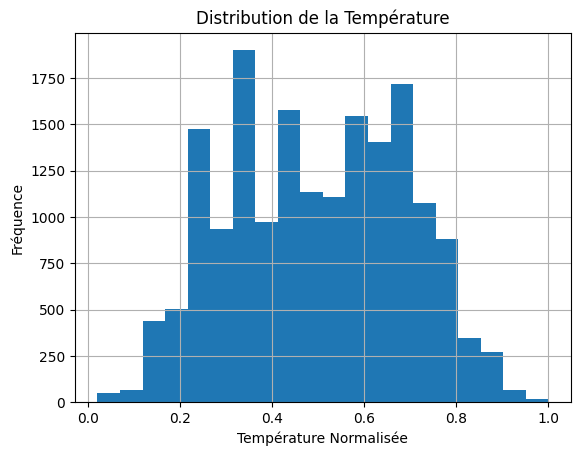

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('datahour_v1.csv')


# Afficher un histogramme des températures
data['temp'].hist(bins=20)
plt.title('Distribution de la Température')
plt.xlabel('Température Normalisée')
plt.ylabel('Fréquence')
plt.show()


## 3.2 Transformation

In [4]:
# Importer LabelEncoder de scikit-learn
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Charger le fichier CSV
data = pd.read_csv('datahour_v1.csv')

# Créer un LabelEncoder
label_encoder = LabelEncoder()

# Liste des colonnes catégorielles à encoder
colonnes_categorielles = [
    'user_activity_level',
    'user_type',
    'zone_type'
]

# Créer une copie du DataFrame pour les colonnes encodées
data_encodee = data.copy()

# Appliquer LabelEncoder à chaque colonne catégorielle et créer de nouvelles colonnes avec les valeurs encodées
for colonne in colonnes_categorielles:
    # Encoder la colonne
    data_encodee[colonne + '_encoded'] = label_encoder.fit_transform(data_encodee[colonne])

# Supprimer les colonnes d'origine si nécessaire (optionnel)
data_encodee = data_encodee.drop(columns=colonnes_categorielles)

# Enregistrer le DataFrame modifié dans un nouveau fichier CSV
data_encodee.to_csv('datahour_encode.csv', index=False)

# Message de confirmation
print("Le fichier avec les colonnes encodées a été enregistré sous le nom 'datahour_encode.csv'.")


Le fichier avec les colonnes encodées a été enregistré sous le nom 'datahour_encode.csv'.


## 3.3 Normalisation

#### Normalisation des variables numériques (MinMaxScaler)

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Charger le fichier CSV
data = pd.read_csv('datahour_encode.csv')


# Exclure la colonne 'instant' (ID) de la normalisation
colonnes_a_exclure = ['instant']

# Sélectionner les colonnes à normaliser en excluant 'instant' et les colonnes catégorielles
colonnes_a_normaliser = [col for col in data.columns if col not in colonnes_a_exclure]

# Créer un MinMaxScaler
scaler = MinMaxScaler()

# Appliquer MinMaxScaler aux colonnes numériques sélectionnées
data[colonnes_a_normaliser] = scaler.fit_transform(data[colonnes_a_normaliser])

# Vérifier les résultats après normalisation
print(data[colonnes_a_normaliser].head())

# Sauvegarder le DataFrame modifié dans un fichier CSV après normalisation
data.to_csv('datahour_normalisation.csv', index=False)

print("Les données normalisées ont été sauvegardées dans le fichier 'datahour_normalisation.csv'.")


   weathersit      temp   atemp   hum  windspeed    casual  registered  \
0         0.0  0.224490  0.2879  0.81        0.0  0.008174    0.014673   
1         0.0  0.204082  0.2727  0.80        0.0  0.021798    0.036117   
2         0.0  0.204082  0.2727  0.80        0.0  0.013624    0.030474   
3         0.0  0.224490  0.2879  0.75        0.0  0.008174    0.011287   
4         0.0  0.224490  0.2879  0.75        0.0  0.000000    0.001129   

        cnt  income_level  user_satisfaction  bike_infrastructure_score  \
0  0.015369      0.837965               0.50                   0.333333   
1  0.039959      0.132296               0.50                   0.666667   
2  0.031762      0.765910               0.75                   0.333333   
3  0.012295      0.603663               0.75                   0.222222   
4  0.000000      0.202075               0.75                   0.444444   

   air_pollution_index  public_transport_access  user_activity_level_encoded  \
0             0.424242  

### Matrice de corrélation aprés normalisation

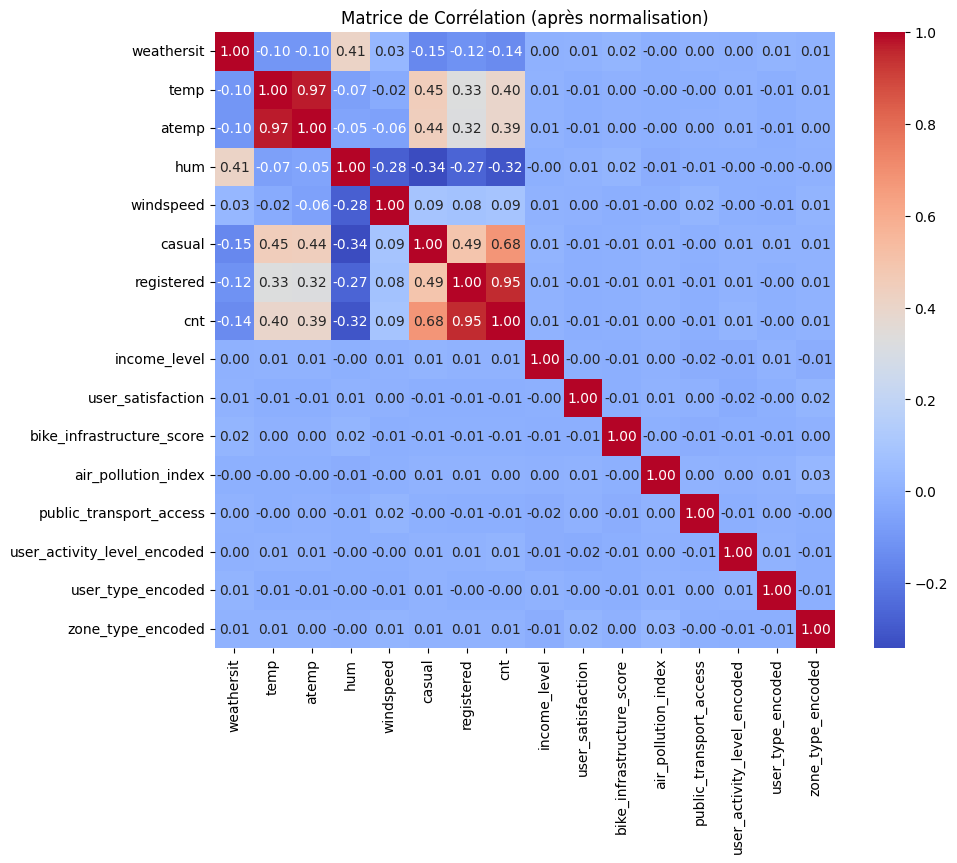

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Charger le fichier CSV
data = pd.read_csv('datahour_normalisation.csv')

# Liste des colonnes catégorielles à exclure
colonnes_a_exclure = ['instant']

# Sélectionner les colonnes en excluant 'instant'
colonnes_a_normaliser = [col for col in data.columns if col not in colonnes_a_exclure]

# Calculer la matrice de corrélation après la normalisation
correlation_matrix = data[colonnes_a_normaliser].corr()

# Optionnel : Visualiser la matrice de corrélation avec une heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation (après normalisation)')
plt.show()

## 3.4 Création de nouvelles fonctionnalités (Feature Engineering)

#### Extraction des caractéristiques de la date

In [9]:
import pandas as pd

# Charger le fichier CSV contenant les données déjà normalisées
data = pd.read_csv('datahour_normalisation.csv')

# 1. Interaction entre Température et Humidité
# Cette nouvelle colonne représente l'effet combiné de la température et de l'humidité
data['temp_hum_interaction'] = data['temp'] * data['hum']

# 2. Ratio des Utilisateurs Occasionnels par Rapport aux Utilisateurs Enregistrés
# Cette colonne calcule le ratio entre les utilisateurs occasionnels et enregistrés
data['casual_registered_ratio'] = data['casual'] / (data['registered'] + 1)  # +1 pour éviter la division par zéro

# 3. Binarisation de la Température
# Cette colonne binaire est égale à 1 si la température est supérieure à 0.5, sinon 0
data['high_temp'] = (data['temp'] > 0.5).astype(int)

# 4. Score d'Expérience Utilisateur
# Cette colonne est la somme du score de satisfaction utilisateur et du score d'infrastructure pour les vélos
data['user_experience_score'] = data['user_satisfaction'] + data['bike_infrastructure_score']

# 5. Moyenne des Locations par Type d'Utilisateur
# Cette fonctionnalité calcule la moyenne des locations (cnt) pour chaque type d'utilisateur encodé
user_type_avg_rentals = data.groupby('user_type_encoded')['cnt'].mean().reset_index()
user_type_avg_rentals.columns = ['user_type_encoded', 'avg_rentals']
# Fusionner les moyennes avec le DataFrame original
data = data.merge(user_type_avg_rentals, on='user_type_encoded', how='left')

# Vérifier les nouvelles fonctionnalités ajoutées
print(data[['temp_hum_interaction', 'casual_registered_ratio', 'high_temp', 'user_experience_score', 'avg_rentals']].head())

# Sauvegarder le DataFrame avec les nouvelles fonctionnalités dans un fichier CSV
data.to_csv('datahour_avec_nouvelles_fonctionnalites.csv', index=False)
print("Le fichier 'datahour_avec_nouvelles_fonctionnalites_normalisees.csv' a été sauvegardé avec succès.")









   temp_hum_interaction  casual_registered_ratio  high_temp  \
0              0.181837                 0.008056          0   
1              0.163265                 0.021039          0   
2              0.163265                 0.013221          0   
3              0.168367                 0.008083          0   
4              0.168367                 0.000000          0   

   user_experience_score  avg_rentals  
0               0.833333     0.192581  
1               1.166667     0.193569  
2               1.083333     0.193569  
3               0.972222     0.192581  
4               1.194444     0.193569  
Le fichier 'datahour_avec_nouvelles_fonctionnalites_normalisees.csv' a été sauvegardé avec succès.


# Partie 4: Modélisation


## Modèles à utiliser :
1. **Régression linéaire** : Modèle de régression simple qui assume une relation linéaire entre les variables indépendantes et la variable cible.
2. **K-Nearest Neighbors (KNN)** : Modèle basé sur la distance entre les points, en utilisant les k voisins les plus proches pour la prédiction.
3. **Support Vector Machines (SVM)** : Modèle qui trouve l'hyperplan optimal pour séparer les données dans l'espace des caractéristiques, avec un noyau linéaire pour la régression.

## 4.1 DSO1 : Prédire le nombre de locations de vélos en fonction des infrastructures de vélo et des facteurs environnementaux.


## Variables principales à utiliser pour DSO1 :
- **bike_infrastructure_score** : Score des infrastructures de vélo
- **public_transport_access** : Accessibilité aux transports publics
- **zone_type** : Type de zone
- **air_pollution_index** : Indice de pollution de l'air

In [14]:
# Modélisation pour DSO1

# Importation des bibliothèques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Charger les données normalisées
data = pd.read_csv('datahour_normalisation.csv')

# Sélectionner les caractéristiques pertinentes pour DSO1
X = data[['bike_infrastructure_score', 'public_transport_access', 'zone_type_encoded', 'air_pollution_index']]
y = data['cnt']  # Nombre de locations de vélos

# Diviser les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modèle 1 : Régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Modèle 2 : K-Nearest Neighbors (KNN)
# Calculer K en fonction du nombre d'enregistrements
n_records = 17484
k_optimal = int(np.sqrt(n_records))
print(f"K optimal selon la racine carrée de N : {k_optimal}")
# Appliquer KNN avec ce K optimal
knn = KNeighborsRegressor(n_neighbors=k_optimal)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Modèle 3 : Support Vector Machines (SVM)
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)

# Comparaison des résultats
print(f"DSO1 - Régression linéaire MSE : {mse_lr}")
print(f"DSO1 - KNN MSE : {mse_knn}")
print(f"DSO1 - SVM MSE : {mse_svm}")


K optimal selon la racine carrée de N : 132
DSO1 - Régression linéaire MSE : 0.03379709440281709
DSO1 - KNN MSE : 0.034279916398517865
DSO1 - SVM MSE : 0.035461572280389625


| **Modèle**                | **MSE**                       |
|---------------------------|-------------------------------|
| Régression Linéaire        | **0.0338**                    |
| KNN (K=132)                | 0.0343                        |
| SVM                        | 0.0355                        |


##### La régression linéaire est le modèle le plus performant avec le MSE le plus bas, indiquant qu'une relation linéaire simple entre les variables d'entrée et la variable cible est suffisante pour prédire le nombre de locations de vélos.


## Validation croisée

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Charger les données normalisées
data = pd.read_csv('datahour_normalisation.csv')

# Sélectionner les caractéristiques pertinentes pour DSO1
X = data[['bike_infrastructure_score', 'public_transport_access', 'zone_type_encoded', 'air_pollution_index']]
y = data['cnt']  # Nombre de locations de vélos

# Normalisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Régression linéaire avec validation croisée
lin_reg = LinearRegression()
cv_scores_lr = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Régression Linéaire - Validation Croisée MSE : {-cv_scores_lr.mean()}")

# KNN avec validation croisée (K=132, basé sur √N)
knn = KNeighborsRegressor(n_neighbors=132)
cv_scores_knn = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"KNN (K=132) - Validation Croisée MSE : {-cv_scores_knn.mean()}")

# SVM avec validation croisée
svm = SVR(kernel='linear')
cv_scores_svm = cross_val_score(svm, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"SVM - Validation Croisée MSE : {-cv_scores_svm.mean()}")


Régression Linéaire - Validation Croisée MSE : 0.03584644127833061
KNN (K=132) - Validation Croisée MSE : 0.03610902437273801
SVM - Validation Croisée MSE : 0.03687862551760916


### Comparaison des résultats avant et après validation croisée :
| **Modèle**                     | **MSE (avant validation)** | **MSE (après validation)** |
|---------------------------------|----------------------------|----------------------------|
| Régression Linéaire             | 0.0338                     | 0.0358                     |
| KNN (K=132)                     | 0.0343                     | 0.0361                     |
| SVM                             | 0.0355                     | 0.0369                     |

#### Les résultats sont très proches avant et après la validation croisée, ce qui est un bon indicateur de la fiabilité des modèles.


### Evaluation des modèles

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fonction pour évaluer les modèles
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse}, MAE: {mae}, R²: {r2}")
    return mse, mae, r2


In [24]:
print("Évaluation des modèles pour DSO1")

# Régression Linéaire pour DSO1
evaluate_model(y_test, y_pred_lr, "Régression Linéaire DSO1")

# KNN pour DSO1
evaluate_model(y_test, y_pred_knn, "KNN DSO1")

# SVM pour DSO1
evaluate_model(y_test, y_pred_svm, "SVM DSO1")


Évaluation des modèles pour DSO1
Régression Linéaire DSO1 - MSE: 0.03376925674959552, MAE: 0.14184056834180775, R²: -0.0019858029048143155
KNN DSO1 - MSE: 0.03405698991163468, MAE: 0.14219607562805142, R²: -0.010523288509723505
SVM DSO1 - MSE: 0.03542971091471394, MAE: 0.1383384067427098, R²: -0.05125403264880335


(0.03542971091471394, 0.1383384067427098, -0.05125403264880335)

### Prédiction

In [28]:
# Supposons que les modèles ont déjà été entraînés avec X_train, y_train
# Utilisation des modèles pour prédire sur X_test

# 1. Prédictions avec le modèle de Régression Linéaire
y_pred_lr = lin_reg.predict(X_test)

# 2. Prédictions avec le modèle KNN
y_pred_knn = knn.predict(X_test)

# 3. Prédictions avec le modèle SVM
y_pred_svm = svm.predict(X_test)

# Afficher quelques résultats de prédiction
print("Prédictions Régression Linéaire :", y_pred_lr[:5])
print("Prédictions KNN :", y_pred_knn[:5])
print("Prédictions SVM :", y_pred_svm[:5])

# Comparer avec les valeurs réelles
print("Valeurs réelles :", y_test[:5].values)


Prédictions Régression Linéaire : [0.19091636 0.19228399 0.19845212 0.19294785 0.19155784]
Prédictions KNN : [0.20942687 0.21172352 0.19548715 0.17366712 0.19493421]
Prédictions SVM : [0.15369162 0.15515003 0.16439559 0.15705641 0.15443972]
Valeurs réelles : [0.35245902 0.30327869 0.07684426 0.00204918 0.24487705]


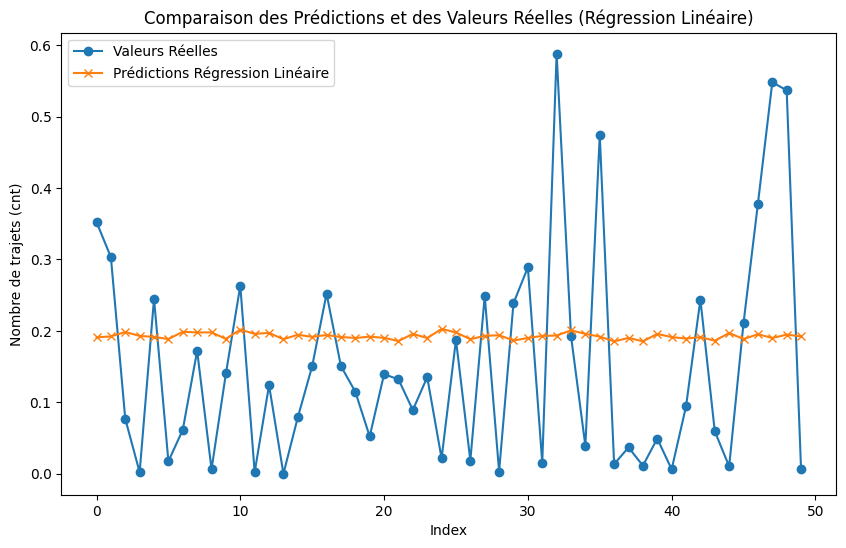

In [29]:
import matplotlib.pyplot as plt

# Comparer les prédictions avec les valeurs réelles pour Régression Linéaire
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:50], label='Valeurs Réelles', marker='o')  # Affichage des 50 premières valeurs réelles
plt.plot(y_pred_lr[:50], label='Prédictions Régression Linéaire', marker='x')
plt.title('Comparaison des Prédictions et des Valeurs Réelles (Régression Linéaire)')
plt.xlabel('Index')
plt.ylabel('Nombre de trajets (cnt)')
plt.legend()
plt.show()


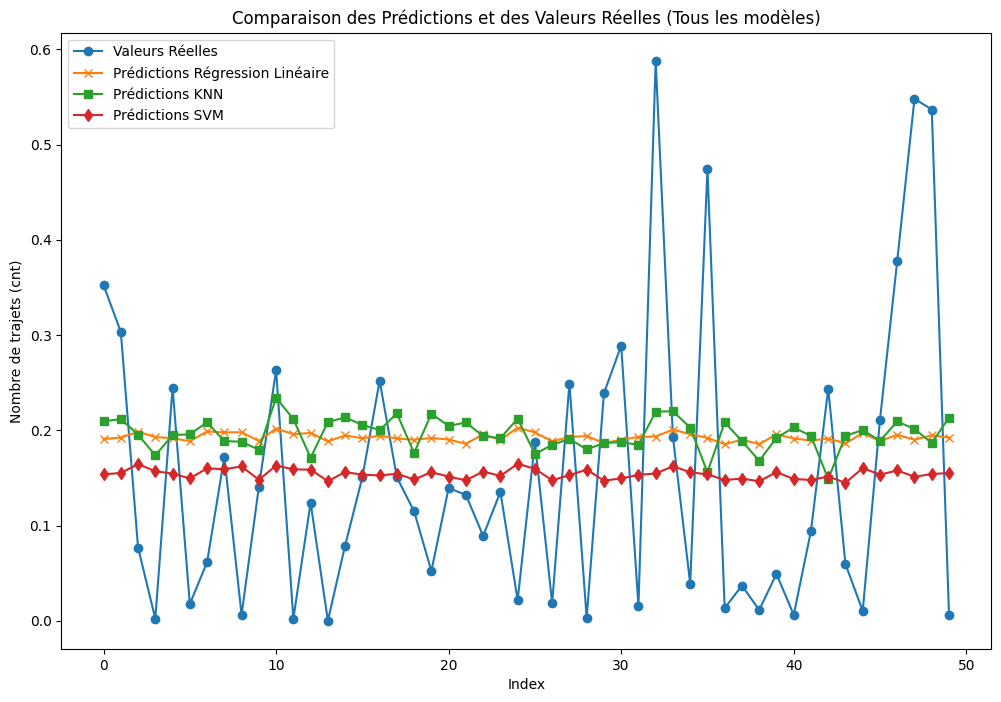

In [30]:
# Comparer les prédictions des trois modèles avec les valeurs réelles
plt.figure(figsize=(12,8))
plt.plot(y_test.values[:50], label='Valeurs Réelles', marker='o')
plt.plot(y_pred_lr[:50], label='Prédictions Régression Linéaire', marker='x')
plt.plot(y_pred_knn[:50], label='Prédictions KNN', marker='s')
plt.plot(y_pred_svm[:50], label='Prédictions SVM', marker='d')
plt.title('Comparaison des Prédictions et des Valeurs Réelles (Tous les modèles)')
plt.xlabel('Index')
plt.ylabel('Nombre de trajets (cnt)')
plt.legend()
plt.show()


# 4.2 DSO2 : Identifier les niveaux d'activité des utilisateurs et leurs habitudes pour ajuster la maintenance.

### Variables principales à utiliser pour DSO2 :
- **user_activity_level** : Niveau d'activité de l'utilisateur.
- **user_satisfaction** : Satisfaction de l'utilisateur.
- **zone_type** (encodée) : Type de zone (ex. : urbain, résidentiel).
- **cnt** : Nombre de trajets (cible à prédire).


In [19]:
# Importation des bibliothèques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Charger les données normalisées
data = pd.read_csv('datahour_normalisation.csv')

# Sélectionner les caractéristiques pertinentes pour DSO2
X = data[['user_activity_level_encoded', 'user_satisfaction', 'zone_type_encoded']]
y = data['cnt']  # Nombre de trajets à prédire (cible)

# Diviser les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Modèle de Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Entraînement du modèle
y_pred_lr = lin_reg.predict(X_test)  # Prédictions

# 2. Modèle KNN (K=132)
knn = KNeighborsRegressor(n_neighbors=132)
knn.fit(X_train, y_train)  # Entraînement du modèle
y_pred_knn = knn.predict(X_test)

# 3. Modèle SVM (noyau linéaire)
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Comparaison des performances des modèles avec l'erreur quadratique moyenne (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print(f"DSO2 - Régression linéaire MSE : {mse_lr}")
print(f"DSO2 - KNN MSE : {mse_knn}")
print(f"DSO2 - SVM MSE : {mse_svm}")


DSO2 - Régression linéaire MSE : 0.033711061607261054
DSO2 - KNN MSE : 0.03394519223020344
DSO2 - SVM MSE : 0.035341589392093295


| **Modèle**                | **MSE**                       |
|---------------------------|-------------------------------|
| Régression Linéaire        | **0.0337**                    |
| KNN (K=132)                | 0.0339                        |
| SVM                        | 0.0353                        |


### Evaluation des modèles

In [25]:
print("Évaluation des modèles pour DSO2")

# Régression Linéaire pour DSO2
evaluate_model(y_test, y_pred_lr, "Régression Linéaire DSO2")

# KNN pour DSO2
evaluate_model(y_test, y_pred_knn, "KNN DSO2")

# SVM pour DSO2
evaluate_model(y_test, y_pred_svm, "SVM DSO2")


Évaluation des modèles pour DSO2
Régression Linéaire DSO2 - MSE: 0.03376925674959552, MAE: 0.14184056834180775, R²: -0.0019858029048143155
KNN DSO2 - MSE: 0.03405698991163468, MAE: 0.14219607562805142, R²: -0.010523288509723505
SVM DSO2 - MSE: 0.03542971091471394, MAE: 0.1383384067427098, R²: -0.05125403264880335


(0.03542971091471394, 0.1383384067427098, -0.05125403264880335)

# 4.3 DSO3 : Analyser l'impact des facteurs socio-économiques et environnementaux sur la location de vélos.

### Variables principales à utiliser pour DSO3 :
- **income_level** : Niveau de revenu.
- **air_pollution_index** : Indice de pollution de l'air.
- **public_transport_access** : Accessibilité aux transports publics.
- **cnt** : Nombre de trajets (cible à prédire).


In [20]:
# Importation des bibliothèques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Charger les données normalisées
data = pd.read_csv('datahour_normalisation.csv')

# Sélectionner les caractéristiques pertinentes pour DSO3
# Utiliser les variables socio-économiques et environnementales
X = data[['income_level', 'air_pollution_index', 'public_transport_access']]
y = data['cnt']  # Nombre de trajets à prédire (cible)

# Diviser les données en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Modèle de Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Entraînement du modèle
y_pred_lr = lin_reg.predict(X_test)  # Prédictions

# 2. Modèle KNN (K=132)
knn = KNeighborsRegressor(n_neighbors=132)
knn.fit(X_train, y_train)  # Entraînement du modèle
y_pred_knn = knn.predict(X_test)

# 3. Modèle SVM (noyau linéaire)
svm = SVR(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Comparaison des performances des modèles avec l'erreur quadratique moyenne (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print(f"DSO3 - Régression linéaire MSE : {mse_lr}")
print(f"DSO3 - KNN MSE : {mse_knn}")
print(f"DSO3 - SVM MSE : {mse_svm}")


DSO3 - Régression linéaire MSE : 0.03376925674959552
DSO3 - KNN MSE : 0.03405698991163468
DSO3 - SVM MSE : 0.03542971091471394


| **Modèle**                | **MSE**                       |
|---------------------------|-------------------------------|
| Régression Linéaire        | **0.0338**                    |
| KNN (K=132)                | 0.0341                        |
| SVM                        | 0.0354                        |


### Evaluation des modèles

In [27]:
print("Évaluation des modèles pour DSO3")

# Régression Linéaire pour DSO3
evaluate_model(y_test, y_pred_lr, "Régression Linéaire DSO3")

# KNN pour DSO3
evaluate_model(y_test, y_pred_knn, "KNN DSO3")

# SVM pour DSO3
evaluate_model(y_test, y_pred_svm, "SVM DSO3")


Évaluation des modèles pour DSO3
Régression Linéaire DSO3 - MSE: 0.03376925674959552, MAE: 0.14184056834180775, R²: -0.0019858029048143155
KNN DSO3 - MSE: 0.03405698991163468, MAE: 0.14219607562805142, R²: -0.010523288509723505
SVM DSO3 - MSE: 0.03542971091471394, MAE: 0.1383384067427098, R²: -0.05125403264880335


(0.03542971091471394, 0.1383384067427098, -0.05125403264880335)

# Partie 6: Déploiement


### Étapes du déploiement :
1. **Enregistrer le modèle** : Vous pouvez utiliser `joblib` ou `pickle` pour sauvegarder votre modèle.
2. **Utiliser Flask ou Streamlit** pour déployer une API ou une application web qui effectue les prédictions en temps réel.
3. **Surveiller les performances** du modèle en production et réentraîner si nécessaire.


### Enregistrement du modèle dans un fichier :

